# Data Challenge 1
This is the first data challenge for the insight data science program. The prompt given to our team of four (Abhilash, Ava, Daniel, and Matt) is provided below:

## Breast Cancer Cell Detection


#### Please limit yourself to 4 hours time!

Your task is to develop a model that predicts whether a biopsied breast cell is benign (not harmful) or malignant (cancerous), given a set of attributes about the cell.

Even though this seems like a fairly straightforward task, there are so many ways you can explore, visualize, engineer your features, and tell a story with this data. It will be interesting to see the different approaches people take! Some important questions to think about are: how can you best explore the data? Why did you select your particular model? How did you validate your model? What insights can you derive from your results?

Follow data challenge best practices. Pay particular attention to how you present your findings - communicate your critical thinking, **tell a data story.** Please code and annotate your analysis in a Jupyter notebook. Please place your submission in the submission folder.

### Please push your submissions to the Submissions sub-folder with the naming convention: lname_fname_DC1.

The dataset consists of 699 cells for which you have the following features:

Sample code number: id number  
Clump Thickness: 1 - 10  
Uniformity of Cell Size: 1 - 10  
Uniformity of Cell Shape: 1 - 10  
Marginal Adhesion: 1 - 10  
Single Epithelial Cell Size: 1 - 10  
Bare Nuclei: 1 - 10  
Bland Chromatin: 1 - 10  
Normal Nucleoli: 1 - 10  
Mitoses: 1 - 10  
Class: (2 for benign, 4 for malignant)

The dataset is also available here: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data

# Cancer classification
First we import the raw dataset:

In [0]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer-wisconsin.csv to breast-cancer-wisconsin.csv


In [0]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("breast-cancer-wisconsin.csv", header=None);
df.columns = ['id','clump_thickness',
              'uniformity_size',
              'uniformity_shape',
              'adhesion',
              'single_cell_size',
              'bare_nuclei',
              'chromatin',
              'normal_nuclei',
              'mitoses',
              'malignant']
 
df['malignant'] = (df['malignant']-2)/2
df.head()

,id,clump_thickness,uniformity_size,uniformity_shape,adhesion,single_cell_size,bare_nuclei,chromatin,normal_nuclei,mitoses,malignant
0,1000025,5,1,1,1,2,1,3,1,1,0.0
1,1002945,5,4,4,5,7,10,3,2,1,0.0
2,1015425,3,1,1,1,2,2,3,1,1,0.0
3,1016277,6,8,8,1,3,4,3,7,1,0.0
4,1017023,4,1,1,3,2,1,3,1,1,0.0


## Data cleaning
The column "bare_nuclei" contains some question marks, which casts the column as strings. We impute these missing values using the median of bare_nuclei (which is 1) and convert the column to numeric.

In [0]:
import numpy as np
bn_med = np.median(df['bare_nuclei'] != '?')
df['bare_nuclei'] = df['bare_nuclei'].replace("?", bn_med)
df['bare_nuclei'] = df['bare_nuclei'].apply(pd.to_numeric)

## Exploratory Data Analysis
We create a pairplot (using Seaborn) to show variable correlations:

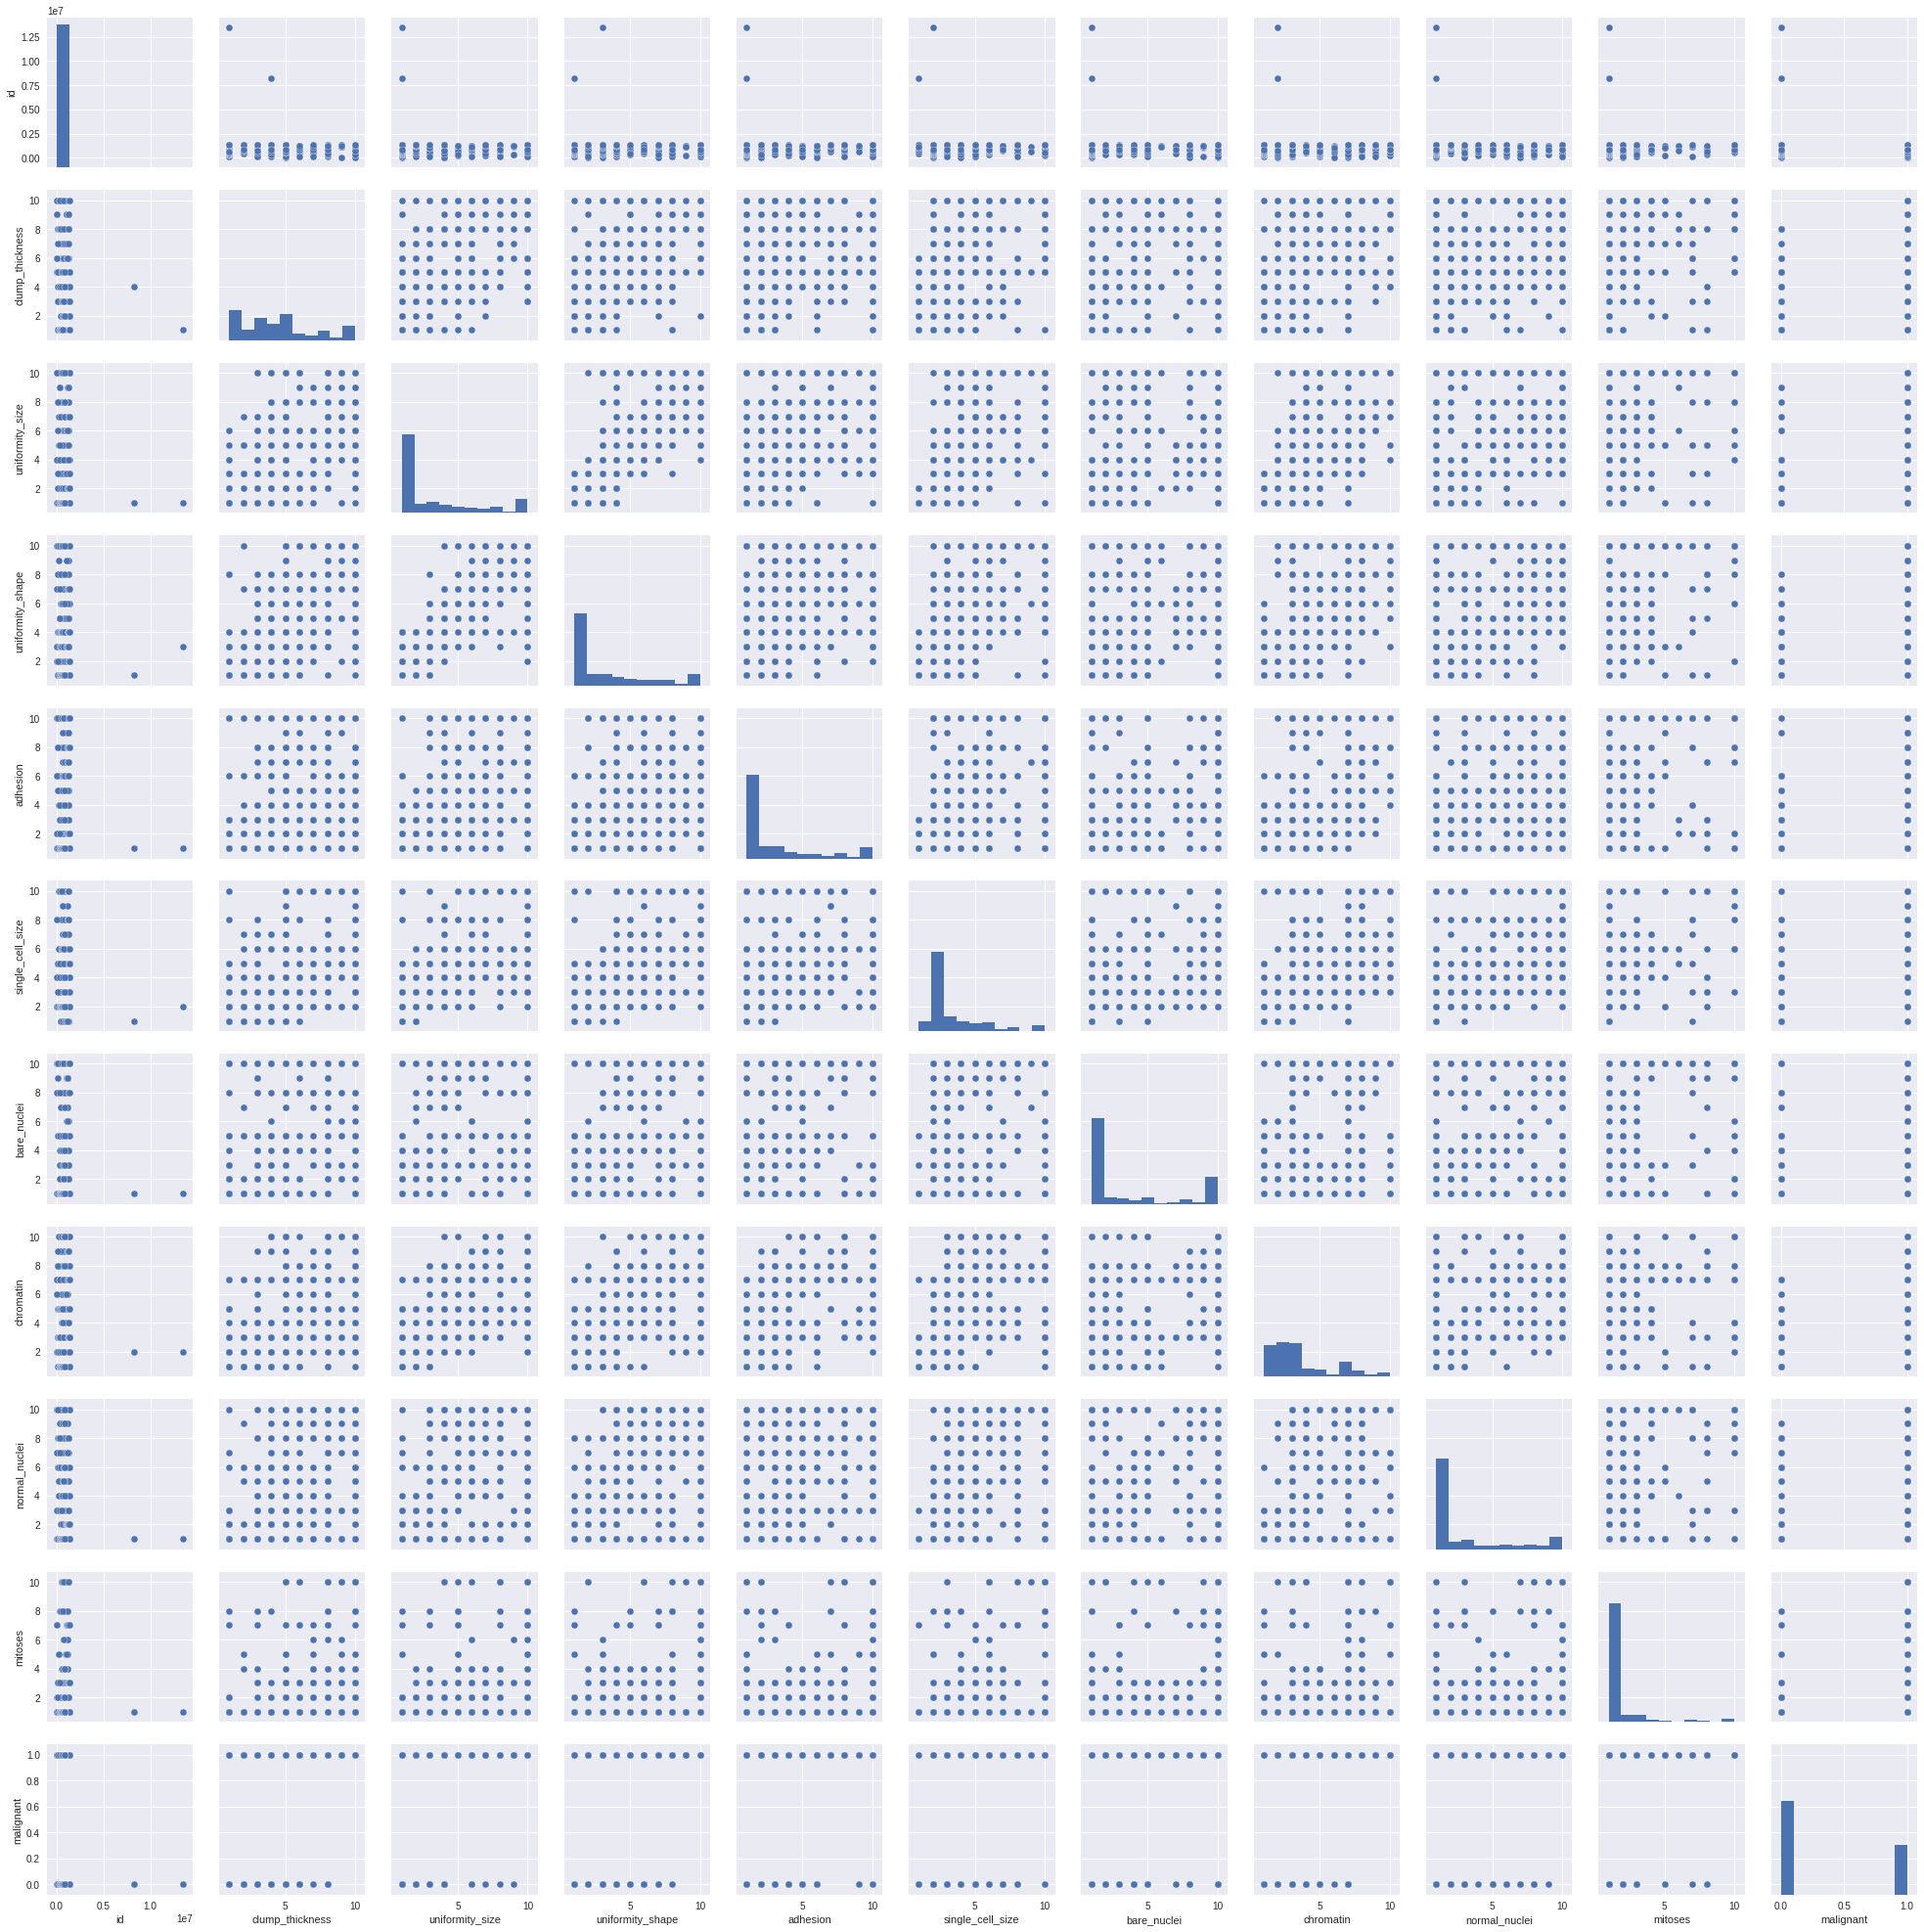

In [0]:
import seaborn as sns

sns.pairplot(df)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving cancer_clean.csv to cancer_clean.csv


In [110]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

df = pd.read_csv('cancer_clean.csv',dtype=int)
df.head()

,id,clump_thickness,uniformity_size,uniformity_shape,adhesion,single_cell_size,bare_nuclei,chromatin,normal_nuclei,mitoses,malignant
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


## Naive Bayes Classifier

We will use scikit-learn's multinomial naive bayes model since this data is not normally distributed

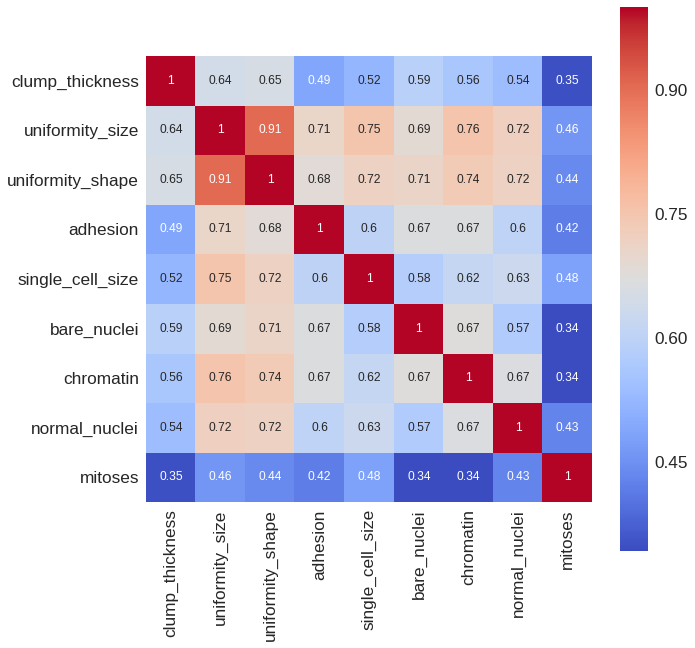

In [111]:
feature_names = list(df.columns[1:10])
label_name = list(df.columns[10:])

features = df[feature_names]
labels = df[label_name]

plt.figure(figsize=(10,10))
sns.heatmap(features.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

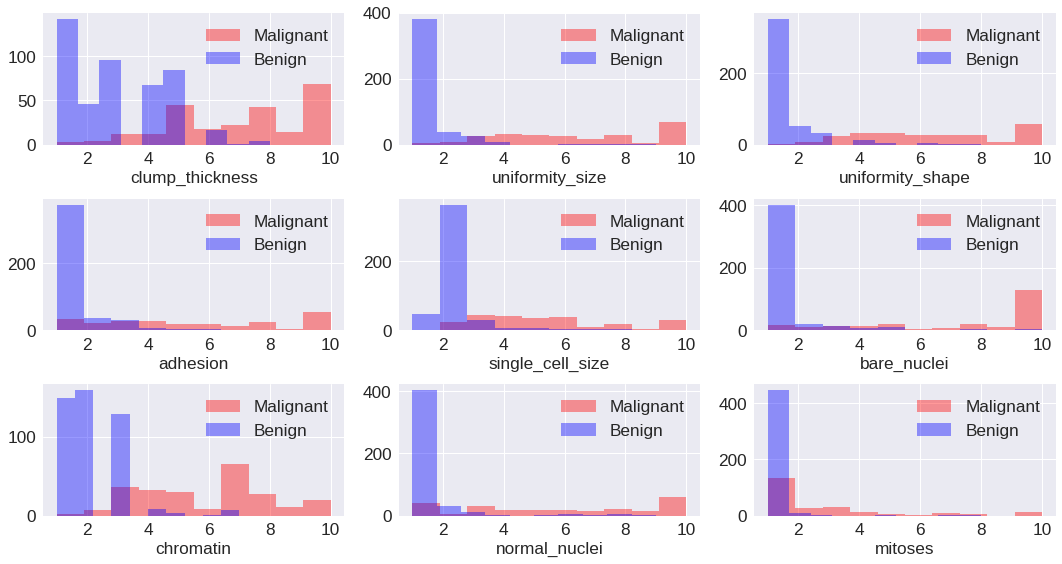

In [122]:
bins = 10
plt.figure(figsize=(15,8))
for i, feature in enumerate(feature_names):
    rows = 3
    
    plt.subplot(rows, 3, i+1)
    
    sns.distplot(df[df['malignant']==1][feature], bins=bins, kde=False, color='red', label='Malignant');
    sns.distplot(df[df['malignant']==0][feature], bins=bins, kde=False, color='blue', label='Benign');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


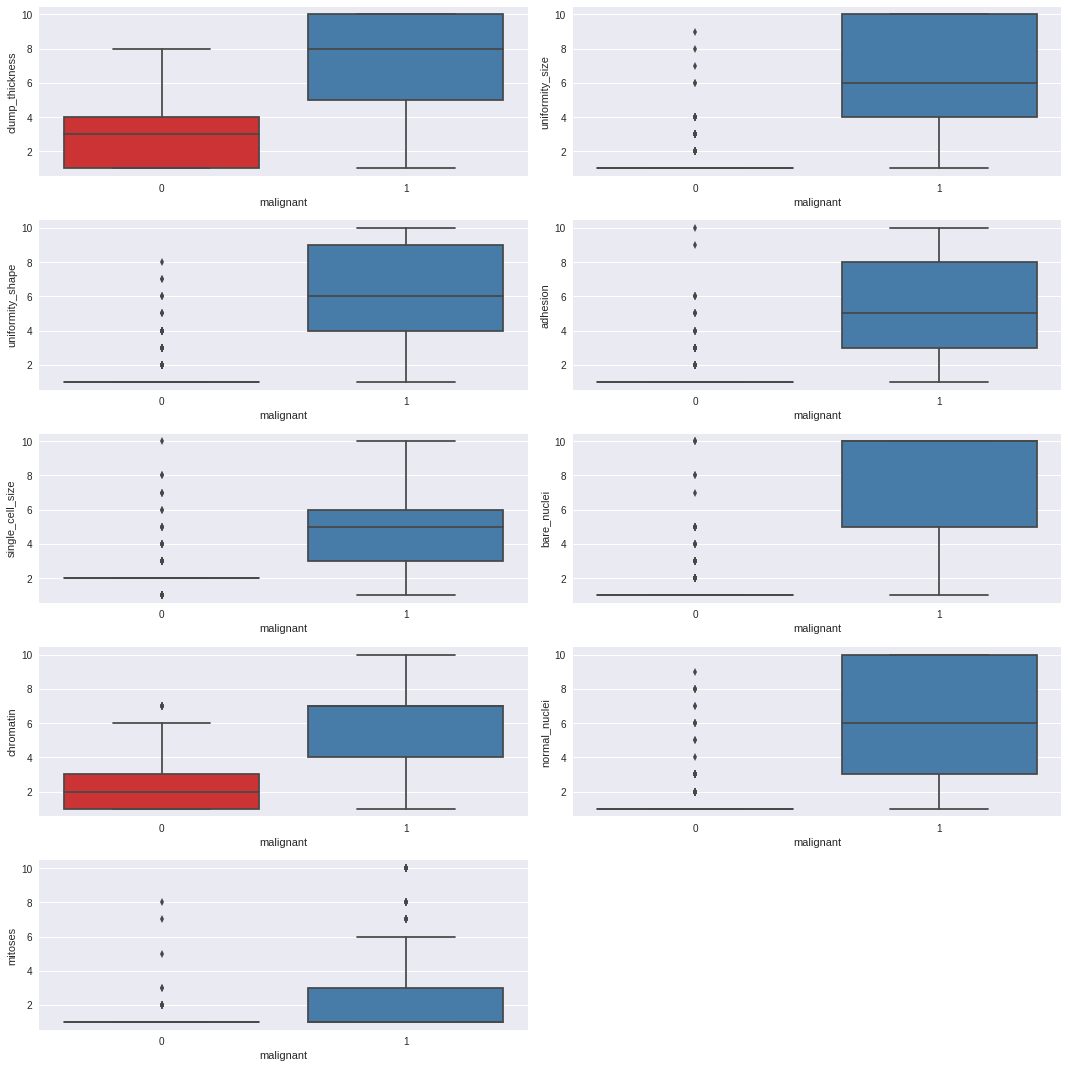

In [77]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = 5
    
    plt.subplot(rows, 2, i+1)
    
    sns.boxplot(x='diagnosis', y=feature, data=data, palette="Set1")

plt.tight_layout()
plt.show()

In [0]:
features_selection = feature_names


In [0]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time

X = df.loc[:,features_selection]
y = df.loc[:, 'malignant']

train, test, train_labels, test_labels = train_test_split(X, y, test_size = 0.33, random_state = 7)

from sklearn.naive_bayes import GaussianNB

# Initialize our classifier
gnb = GaussianNB()
# Train our classifier
model = gnb.fit(train, train_labels)

In [134]:
# Make predictions
preds = gnb.predict(test);
from sklearn.metrics import accuracy_score
# Evaluate accuracy
print("67%Train 33%Test Accuracy: ",accuracy_score(test_labels, preds))

# Evaluate using a train and a test set
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=test_size, random_state=seed)
model = GaussianNB()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
expected = y_test
result = model.score(X_test, y_test)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(expected, predicted)
print(test_size,"test size Accuracy: %.3f%%" % (result*100.0))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(expected, predicted, average="macro"))
print(precision_score(expected, predicted, average="macro"))
print(recall_score(expected, predicted, average="macro"))   




from sklearn import cross_validation
# Gaussian Naive Bayes Classification
num_folds = 10
num_instances = len(X)
seed = 7
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
model = GaussianNB()
results = cross_validation.cross_val_score(model, X, y, cv=kfold)
print("10-fold CV Accuracy: %.3f%% (%.3f%%)" % ( results.mean()*100.0, results.std()*100.0 ))


# Evaluate using Leave One Out Cross Validation
num_folds = 10
num_instances = len(X)
loocv = cross_validation.LeaveOneOut(n=num_instances)
model = GaussianNB()
results = cross_validation.cross_val_score(model, X, y, cv=loocv)
print("LOOCV Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

67%Train 33%Test Accuracy:  0.948051948051948
0.33 test size Accuracy: 94.805%
0.9429629629629629
0.9382937154021491
0.9483677548301133
10-fold CV Accuracy: 95.996% (2.694%)
LOOCV Accuracy: 95.994% (19.609%)


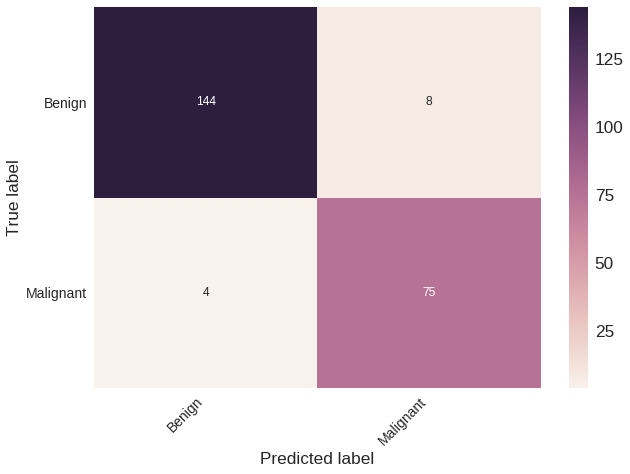

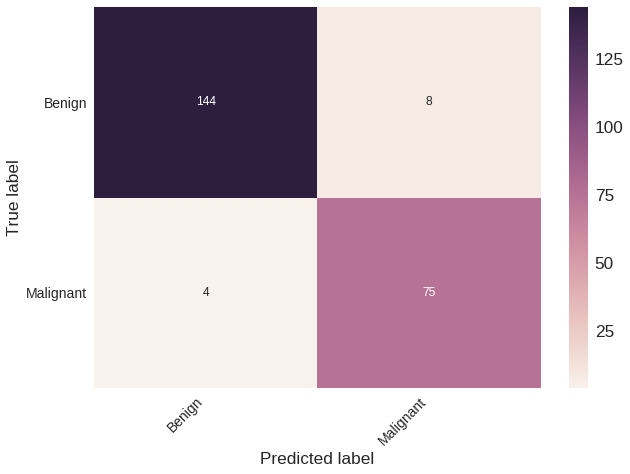

In [133]:
print_confusion_matrix(mat, ['Benign','Malignant'])

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [59]:
from sklearn.linear_model import SGDClassifier

start = time.time()

clf = SGDClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

SGD Classifier Accuracy: 85.00%
Cross validation score: 95.15% (+/- 5.87%)
Execution time: 0.019509 seconds 



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/dist-packages/s

In [31]:
features.head()

,clump_thickness,uniformity_size,uniformity_shape,adhesion,single_cell_size,bare_nuclei,chromatin,normal_nuclei,mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [0]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [0]:
from sklearn.model_selection import train_test_split


In [15]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()

for index, col in enumerate( df[::1] ):
    #df_train[index], X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    print(col)
        

id
clump_thickness
uniformity_size
uniformity_shape
adhesion
single_cell_size
bare_nuclei
chromatin
normal_nuclei
mitoses
malignant
